In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import re

In [267]:
job = pd.read_csv('gsearch_jobs.csv', low_memory=False)

In [276]:
job.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,work_type
0,0.0,0.0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']",[Full-time]
1,1.0,1.0,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['mysql', 'matplotlib', 'r', 'matlab', 'mongod...",[Contractor]
2,2.0,2.0,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Full-time]
3,3.0,3.0,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'powerpoint', 'tableau', 'qlik', 'pow...",[Full-time]
4,4.0,4.0,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Part-time]


In [16]:
job.shape

(31494, 27)

In [277]:
job['posted_at'].unique()

array(['21 hours ago', '17 hours ago', '12 hours ago', '10 hours ago',
       '18 hours ago', '15 hours ago', '6 hours ago', '9 hours ago',
       '3 hours ago', '4 hours ago', '24 hours ago', '20 hours ago',
       '11 hours ago', '22 hours ago', '19 hours ago', '13 hours ago',
       '14 hours ago', '23 hours ago', '5 hours ago', '16 hours ago',
       '7 hours ago', '8 hours ago', '53 minutes ago', '2 hours ago',
       '1 hour ago', '52 minutes ago', '37 minutes ago', '30 minutes ago',
       '12 minutes ago', '15 minutes ago', '38 minutes ago',
       '47 minutes ago', '49 minutes ago', '58 minutes ago',
       '27 minutes ago', '19 minutes ago', '59 minutes ago',
       '57 minutes ago', '50 minutes ago', '51 minutes ago',
       '55 minutes ago', '1 day ago', '5 minutes ago', '9 minutes ago',
       '18 minutes ago', '36 minutes ago', '40 minutes ago',
       '42 minutes ago', '43 minutes ago', '56 minutes ago',
       '17 minutes ago', '39 minutes ago', '44 minutes ago',
      

In [269]:
job_salary = job.dropna(subset = ['salary_avg'])
job_salary.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
13,13,13,Data Scientist - Contract to hire,Upwork,Anywhere,via Upwork,Are you seeking a skilled and innovative data ...,"['20 hours ago', '40–75 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCAtIENvbn...,NaN,20 hours ago,Contractor,True,40–75 an hour,data analyst,2023-08-03 03:00:11.064921,United States,NaN,40–75,an hour,57.500,40.00,75.0,57.500,NaN,119600.0,"['power_bi', 'tableau', 'python', 'excel']"
19,19,19,"Data Analyst Report Writer (Level 2) _ Austin,...",OQ Point LLC,Anywhere,via Adzuna,JOB DESCRIPTION/MINIMUM REQUIREMENTS:\n\nClien...,"['22 hours ago', '43–48 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgUmVwb3J0IF...,NaN,22 hours ago,Full-time,True,43–48 an hour,data analyst,2023-08-03 03:00:11.064921,United States,NaN,43–48,an hour,45.500,43.00,48.0,45.500,NaN,94640.0,"['pl/sql', 'tableau', 'sql']"
24,24,24,Mixpanel Expert - setup and configuration,Upwork,Anywhere,via Upwork,We are planning to install Mixpanel on a game ...,"['13 hours ago', '17–46 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJNaXhwYW5lbCBFeHBlcnQgLSBzZX...,NaN,13 hours ago,Contractor,True,17–46 an hour,data analyst,2023-08-03 03:00:13.367401,United States,NaN,17–46,an hour,31.500,17.00,46.0,31.500,NaN,65520.0,[]
29,29,29,Associate Research/Data Analyst-CES - Now Hiring,Saint Louis County Clerks Office,"Jefferson City, MO",via Snagajob,Why you'll love working for this Department:\n...,"['9 hours ago', '18.33–28.20 an hour', 'Full-t...",eyJqb2JfdGl0bGUiOiJBc3NvY2lhdGUgUmVzZWFyY2gvRG...,NaN,9 hours ago,Full-time,NaN,18.33–28.20 an hour,data analyst,2023-08-03 03:00:13.367401,United States,NaN,18.33–28.20,an hour,23.265,18.33,28.2,23.265,NaN,48391.2,[]
38,38,38,Mixpanel Expert - setup and configuration,Upwork,Anywhere,via Upwork,We are planning to install Mixpanel on a game ...,"['13 hours ago', '17–46 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJNaXhwYW5lbCBFeHBlcnQgLSBzZX...,NaN,13 hours ago,Contractor,True,17–46 an hour,data analyst,2023-08-03 03:00:21.659286,United States,NaN,17–46,an hour,31.500,17.00,46.0,31.500,NaN,65520.0,[]


In [35]:
job_salary.shape

(5751, 27)

In [270]:
job_salary[job_salary['title'] == "Data Analyst"].shape

(536, 27)

In [271]:
junior_data = job_salary[job_salary['title'] == "Junior Data Analyst"]
data_analyst = job_salary[job_salary['title'] == "Data Analyst"]
senior_data = job_salary[job_salary['title'] == "Senior Data Analyst"]

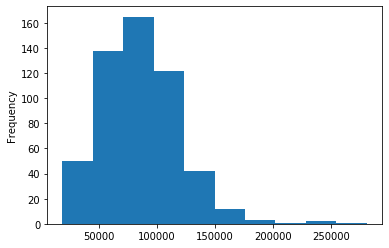

In [74]:
data_analyst['salary_standardized'].plot.hist()
plt.show()

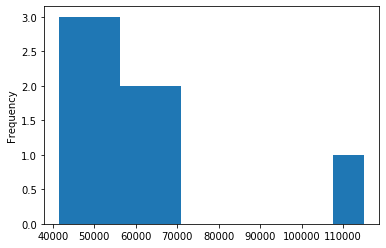

In [75]:
junior_data['salary_standardized'].plot.hist()
plt.show()

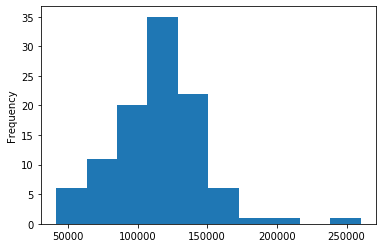

In [76]:
senior_data['salary_standardized'].plot.hist()
plt.show()

In [83]:
data_analyst_home = data_analyst[data_analyst['work_from_home'] == True]
data_analyst_onsite = data_analyst[data_analyst['work_from_home'] != True]

In [78]:
data_analyst_home.shape

(354, 27)

In [84]:
data_analyst_onsite.shape

(182, 27)

In [85]:
data_analyst_home['salary_standardized'].mean()

91247.86257062147

In [86]:
data_analyst_onsite['salary_standardized'].mean()

77407.160989011

In [87]:
senior_home = senior_data[senior_data['work_from_home'] == True]
senior_onsite = senior_data[senior_data['work_from_home'] != True]

In [88]:
senior_home['salary_standardized'].mean()

116782.8949137931

In [89]:
senior_onsite['salary_standardized'].mean()

109236.66888888887

In [272]:
job['schedule_type'].unique()

array(['Full-time', 'Contractor', 'Part-time', 'Internship', nan,
       'Part-time and Internship', 'Contractor and Temp work',
       'Full-time and Part-time', 'Full-time and Temp work',
       'Full-time and Internship', 'Full-time and Contractor',
       'Temp work', 'Full-time, Part-time, and Temp work',
       'Part-time and Contractor', 'Full-time and Per diem',
       'Part-time and Temp work', 'Part-time, Contractor, and Temp work',
       'Full-time, Contractor, and Temp work',
       'Full-time, Part-time, and Contractor', 'Temp work and Internship',
       'Full-time, Part-time, and Internship'], dtype=object)

In [273]:
job[job['schedule_type'] == 'nan'] = np.nan

In [274]:
def schedule_type(x):
    types = ['Full-time', 'Contractor', 'Part-time', 'Internship']
    lst_types = []
    for type_work in types:
        if str(x) == 'nan':
            return np.nan
        else:
            if type_work in x:
                lst_types.append(type_work)
    return lst_types

job['work_type'] = job['schedule_type'].apply(schedule_type)

In [275]:
job_full_time = job["Full-time" in job['work_type']]

KeyError: False

In [136]:
job[job['title'] == 'Data Analyst'].count()

Unnamed: 0             3714
index                  3714
title                  3714
company_name           3714
location               3707
via                    3705
description            3714
extensions             3714
job_id                 3714
thumbnail              2342
posted_at              3714
schedule_type          3688
work_from_home         1131
salary                  536
search_term            3714
date_time              3714
search_location        3714
commute_time              0
salary_pay              536
salary_rate             536
salary_avg              536
salary_min              484
salary_max              484
salary_hourly           331
salary_yearly           205
salary_standardized     536
description_tokens     3714
work_type              3688
dtype: int64

In [175]:
mask = job_salary['title'].str.contains(r'\bsenior\b', case=False)
senior_titles = job_salary[mask]
senior_titles.count()

Unnamed: 0             528
index                  528
title                  528
company_name           528
location               528
via                    528
description            528
extensions             528
job_id                 528
thumbnail              186
posted_at              528
schedule_type          527
work_from_home         184
salary                 528
search_term            528
date_time              528
search_location        528
commute_time             0
salary_pay             528
salary_rate            528
salary_avg             528
salary_min             498
salary_max             498
salary_hourly          105
salary_yearly          422
salary_standardized    528
description_tokens     528
dtype: int64

In [176]:
mask = job_salary['title'].str.contains(r'\bjunior\b', case=False)
junior_titles = job_salary[mask]
junior_titles.count()

Unnamed: 0             33
index                  33
title                  33
company_name           33
location               33
via                    33
description            33
extensions             33
job_id                 33
thumbnail               7
posted_at              33
schedule_type          33
work_from_home         22
salary                 33
search_term            33
date_time              33
search_location        33
commute_time            0
salary_pay             33
salary_rate            33
salary_avg             33
salary_min             31
salary_max             31
salary_hourly          22
salary_yearly          10
salary_standardized    33
description_tokens     33
dtype: int64

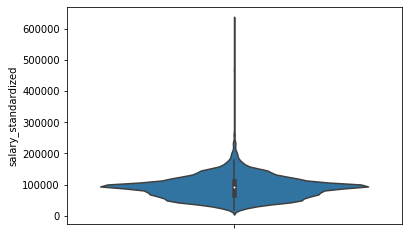

In [170]:
sns.violinplot(data=senior_titles, y='salary_standardized')

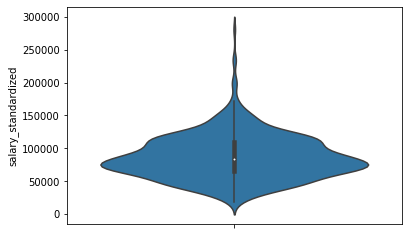

In [171]:
sns.violinplot(data=data_analyst, y='salary_standardized')

In [244]:
data_analyst['job_lvl'] = "Mid-level Data Analyst"
senior_titles['job_lvl'] = "C"
senior_data['job_lvl'] = "Senior Data Analyst"
junior_titles['job_lvl'] = "Junior Data Analyst"


C:\Users\prodi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prodi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prodi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [245]:
job_plot_sales = pd.concat([junior_titles, data_analyst, senior_data], ignore_index=True)
job_plot_sales

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,job_lvl
0,1036,1036,Business Data Analyst (Junior),The Elite Job,Anywhere,via Elite Job,The Elite Job is a leading and innovative comp...,"['3 hours ago', '20–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBEYXRhIEFuYWx5c3...,NaN,3 hours ago,Full-time,True,20–30 an hour,data analyst,2023-08-19 03:00:25.512031,United States,NaN,20–30,an hour,25,20,30,25,NaN,52000,"['r', 'power_bi', 'java', 'tableau', 'python',...",Junior Data Analyst
1,2162,151,Business Data Analyst (Junior),The Elite Job,Anywhere,via The EliteJob,The Elite Job is a leading and innovative comp...,"['3 hours ago', '20–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBEYXRhIEFuYWx5c3...,NaN,3 hours ago,Full-time,True,20–30 an hour,data analyst,2023-08-09 03:00:23.277759,United States,NaN,20–30,an hour,25,20,30,25,NaN,52000,"['r', 'power_bi', 'java', 'tableau', 'python',...",Junior Data Analyst
2,2163,152,Business Data Analyst (Junior),The Elite Job,Anywhere,via The EliteJob,The Elite Job is a leading and innovative comp...,"['3 hours ago', '20–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBEYXRhIEFuYWx5c3...,NaN,3 hours ago,Full-time,True,20–30 an hour,data analyst,2023-08-10 03:00:21.754665,United States,NaN,20–30,an hour,25,20,30,25,NaN,52000,"['r', 'power_bi', 'java', 'tableau', 'python',...",Junior Data Analyst
3,2164,153,Business Data Analyst (Junior),The Elite Job,Anywhere,via The EliteJob,The Elite Job is a leading and innovative comp...,"['3 hours ago', '20–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBEYXRhIEFuYWx5c3...,NaN,3 hours ago,Full-time,True,20–30 an hour,data analyst,2023-08-11 03:00:23.209608,United States,NaN,20–30,an hour,25,20,30,25,NaN,52000,"['r', 'power_bi', 'java', 'tableau', 'python',...",Junior Data Analyst
4,2866,855,Business Data Analyst (Junior),The Elite Job,Anywhere,via Elite Job,The Elite Job is a leading and innovative comp...,"['3 hours ago', '20–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBEYXRhIEFuYWx5c3...,NaN,3 hours ago,Full-time and Part-time,True,20–30 an hour,data analyst,2023-10-01 03:00:30.328818,United States,NaN,20–30,an hour,25,20,30,25,NaN,52000,"['r', 'power_bi', 'java', 'tableau', 'python',...",Junior Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,28235,1116,Senior Data Analyst,Ortho Clinical Diagnostics,United States,via WANE Jobs,The Opportunity\n\nQuidelOrtho unites the stre...,"['14 hours ago', '80K–143K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,14 hours ago,Full-time,NaN,80K–143K a year,data analyst,2023-02-09 04:00:19.952712,United States,NaN,80K–143K,a year,111500,80000,143000,NaN,111500,111500,"['power_bi', 'sap', 'excel']",Senior Data Analyst
669,31124,277,Senior Data Analyst,Harnham,United States,via Big Country Jobs,SENIOR DATA ANALYST\n\nREMOTE - NEED TO WORK P...,"['13 hours ago', '120K–140K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN,13 hours ago,Full-time,NaN,120K–140K a year,data analyst,2023-01-19 04:00:28.345811,United States,NaN,120K–140K,a year,130000,120000,140000,NaN,130000,130000,"['power_bi', 'tableau', 'sql', 'looker']",Senior Data Analyst
670,31140,293,Senior Data Analyst,Harnham,United States,via Big Country Jobs,SENIOR DATA ANALYST\n\nREMOTE - NEED TO WORK P...,"['15 hours ago', '120K–140K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN,15 hours ago,Full-time,NaN,120K–140K a year,data analyst,2022-12-08 04:00:15.975728,United States,NaN,120K–140K,a year,130000,120000,140000,NaN,130

In [246]:
index_to_drop = job_plot_sales[job_plot_sales['salary_standardized'] == 'B'].index
job_plot_sales.drop(index_to_drop, inplace=True)

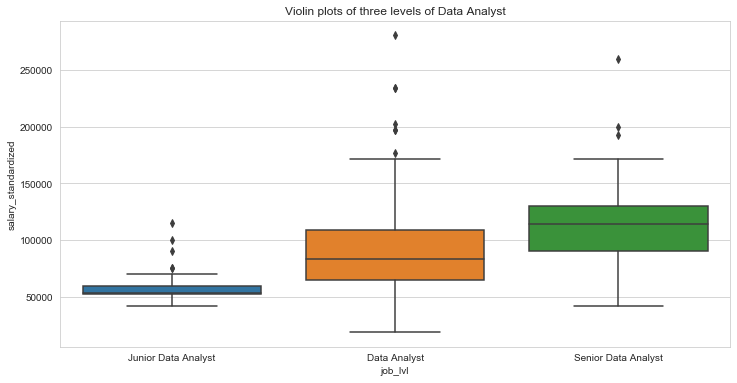

In [232]:
sns.set_style("whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_lvl', y='salary_standardized', data=job_plot_sales)

plt.title('Violin plots of three levels of Data Analyst')
plt.show()

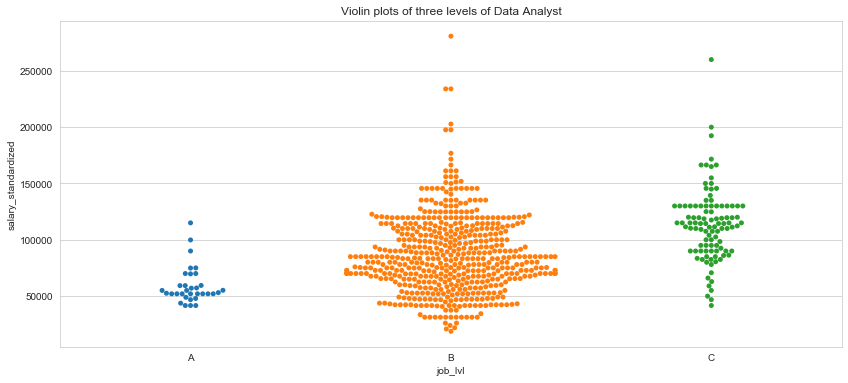

In [226]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
sns.swarmplot(x='job_lvl', y='salary_standardized', data=job_plot_sales)

plt.title('Violin plots of three levels of Data Analyst')
plt.show()

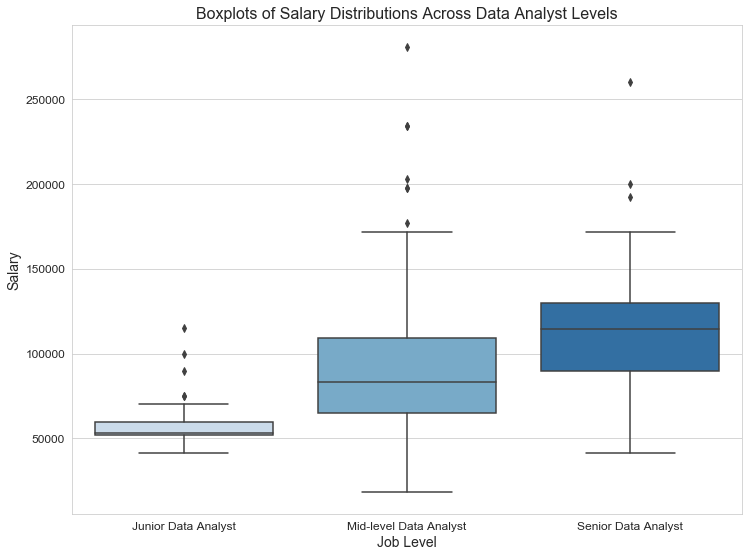

In [253]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 9))
sns.boxplot(x='job_lvl', y='salary_standardized', data=job_plot_sales, palette="Blues")



plt.title('Boxplots of Salary Distributions Across Data Analyst Levels', fontsize=16)
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


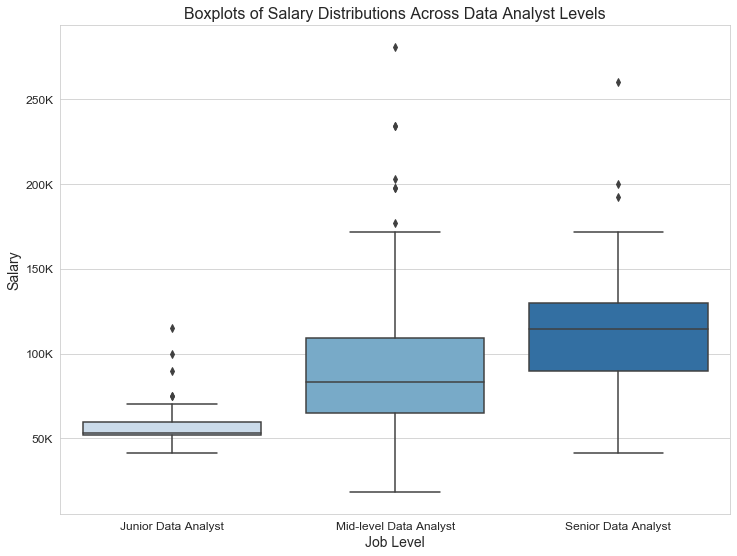

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_style("whitegrid")

plt.figure(figsize=(12, 9))
ax = sns.boxplot(x='job_lvl', y='salary_standardized', data=job_plot_sales, palette="Blues")

#ax.grid(False)

def format_func(value, tick_number):
    return f"{value/1000:.0f}K"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.title('Boxplots of Salary Distributions Across Data Analyst Levels', fontsize=16)
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [259]:
index_to_drop = data_analyst[data_analyst['salary_standardized'] == 'B'].index
data_analyst.drop(index_to_drop, inplace=True)

C:\Users\prodi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [261]:
data_analyst['salary_standardized'].mean()

86548.2213619403

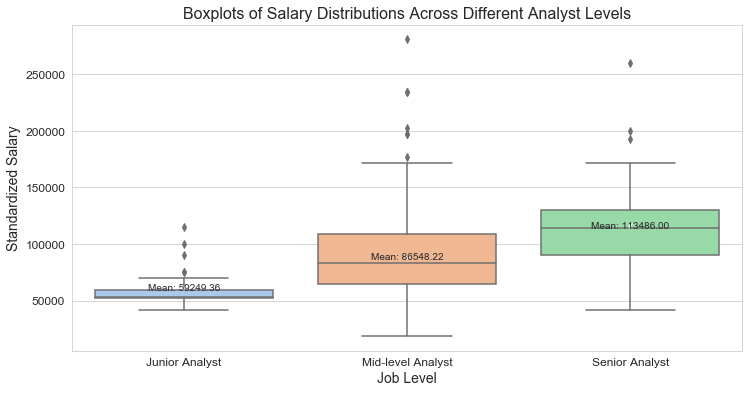

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_lvl', y='salary_standardized', data=job_plot_sales, palette="pastel")

# Calculate and annotate the mean values
for i, job in enumerate(job_plot_sales['job_lvl'].unique()):
    mean_val = job_plot_sales[job_plot_sales['job_lvl'] == job]['salary_standardized'].mean()
    plt.annotate(f'Mean: {mean_val:.2f}', xy=(i, mean_val), 
                 xytext=(i, mean_val + 5),  # Adjust this offset as needed
                 ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'))

# Modify the x-axis labels with more descriptive names
descriptive_labels = ['Junior Analyst', 'Mid-level Analyst', 'Senior Analyst']
plt.xticks(ticks=range(len(descriptive_labels)), labels=descriptive_labels)

# Set title and labels with adjusted font sizes
plt.title('Boxplots of Salary Distributions Across Different Analyst Levels', fontsize=16)
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('Standardized Salary', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [ ]:
combination_counts = df.groupby(['schedule_type', 'work_from_home_filled']).size().reset_index(name='counts')

#Reshape data into matrix format using pivot
heatmap_data = combination_counts.pivot('schedule_type', 'work_from_home_filled', 'counts').fillna(0)

#heatmap
plt.figure(figsize=(10, 10))
#fmt=g for number formatting

plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Platform', fontsize=14)

new_labels = ['Remote', 'On-site']  # Replace these with the desired labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="Blues")
plt.title('Correlation between schedule_type and work_from_home')
plt.show()

In [289]:
job_position['salary_standardized'].mean()

98406.9499597586

In [279]:
job_position = job[(job['schedule_type'] == 'Full-time') & (job['schedule_type'] == 'Full-time') & (job['schedule_type'] == 'Full-time') & (job['schedule_type'] == 'Full-time')]
job_position

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,work_type
0,0.0,0.0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']",[Full-time]
2,2.0,2.0,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Full-time]
3,3.0,3.0,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'powerpoint', 'tableau', 'qlik', 'pow...",[Full-time]
5,5.0,5.0,Research Data Analyst 1,Oregon Health & Science University,Anywhere,via Indeed,Department Overview:\n\nThis position exists w...,"['17 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJSZXNlYXJjaCBEYXRhIEFuYWx5c3...,NaN,17 hours ago,Full-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Full-time]
6,6.0,6.0,Data Analyst,Coinbase,Anywhere,via Startup Jobs,"At Coinbase, our mission is to increase econom...","['15 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,15 hours ago,Full-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'r', 'gdpr', 'aws', 'python', 'sql...",[Full-time]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31489,31489.0,642.0,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,23 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-04 03:40:23.706734,United States,NaN,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['power_bi', 'tableau', 'r', 'python', 'sql', ...",[Full-time]
31490,31490.0,643.0,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-11-24 04:00:08.710801,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],[Full-time]
31491,31491.0,644.0,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,23 hours ago,Full-time,NaN,"106,916–182,047 a year",data analyst,2022-12-07 04:00:12.563831,United States,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],[Full-time]
31492,31492.0,645.0,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their..."

In [288]:
combination_counts = job_position.groupby(['schedule_type', 'work_from_home']).size().reset_index(name='counts')

#Reshape data into matrix format using pivot
heatmap_data = combination_counts.pivot('schedule_type', 'work_from_home', 'counts').fillna(0)

#heatmap
plt.figure(figsize=(10, 10))
#fmt=g for number formatting

# plt.xlabel('Work Type', fontsize=14)
# plt.ylabel('Platform', fontsize=14)

# new_labels = ['Remote', 'On-site']  # Replace these with the desired labels
# plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

sns.heatmap(job_position, annot=True, fmt="g", cmap="Blues")
plt.title('Correlation between schedule_type and work_from_home')
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 720x720 with 0 Axes>